<a href="https://colab.research.google.com/github/145942/AI-Coursework-2025/blob/main/Mall_Customers_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Mall_Customers.csv to Mall_Customers (1).csv
Data Loaded Successfully!

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

 Checking for missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-

/tmp/ipython-input-2685910372.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Gender", palette="magma")


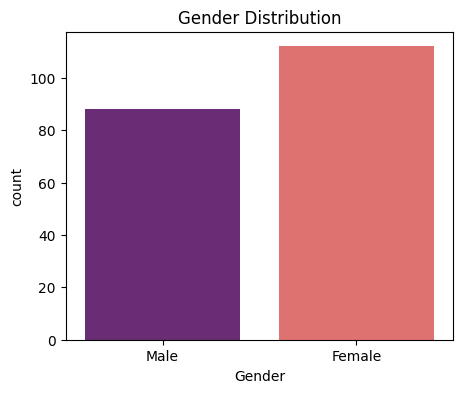

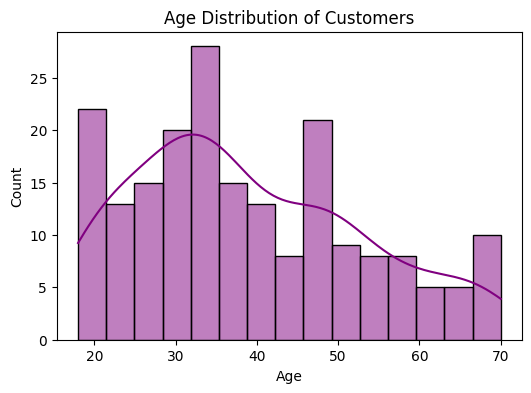

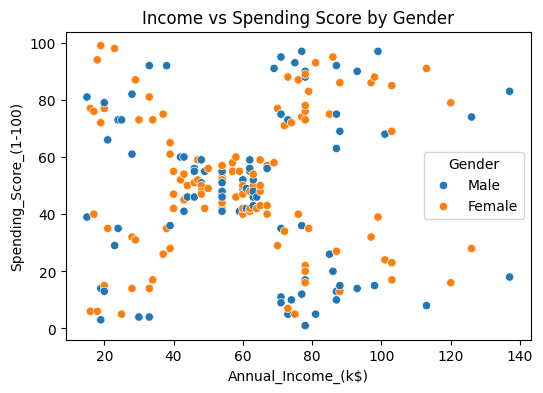


 INSIGHTS:
Many customers are female, showing possible gender bias in the customer base.
Most customers are aged between 25–40.
There’s a visible pattern showing that customers with moderate income tend to have higher spending scores.


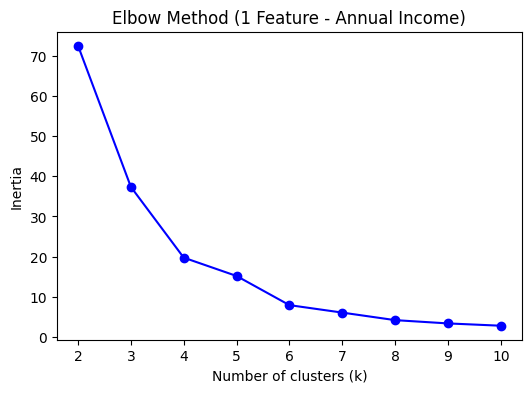

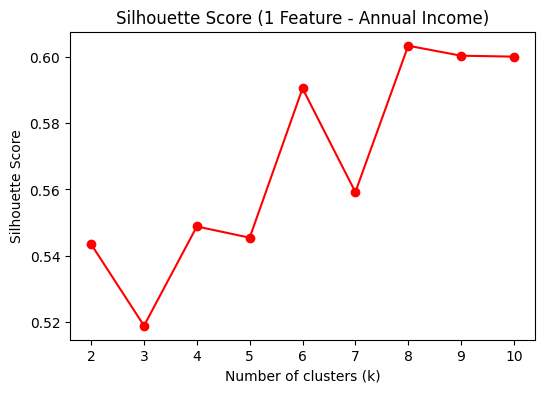

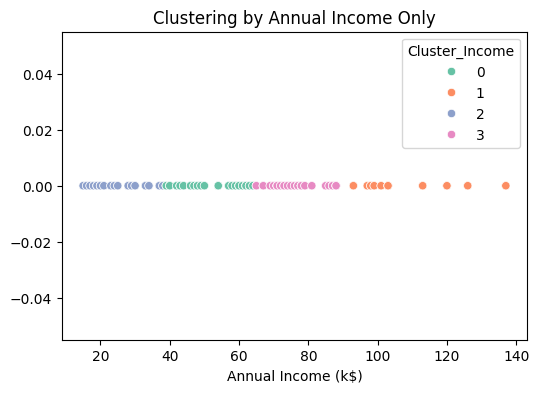

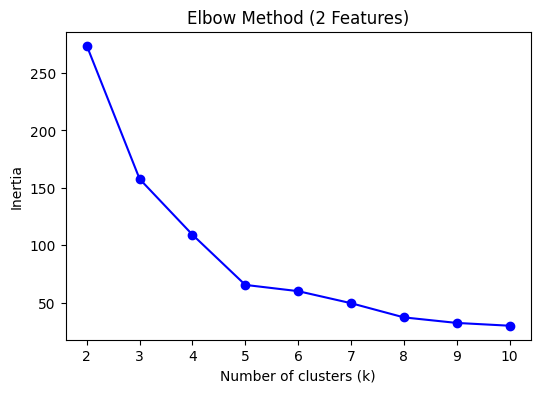

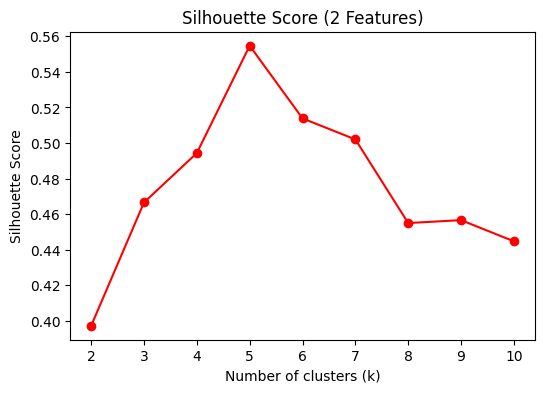

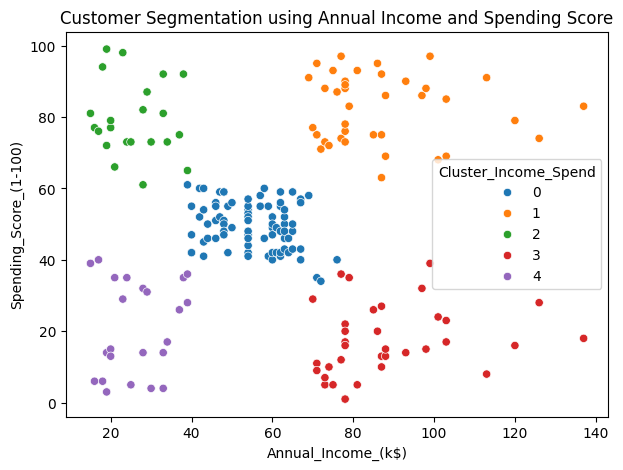


 CLUSTER COMPARISON:
1 Shows groups customers by income level
2 Shows income groups

 RECOMMENDATIONS BASED ON 2-FEATURE CLUSTERS:

Cluster 1: Low income, low spenders → Offer discounts or loyalty programs to boost engagement.
Cluster 2: High income, low spenders → Target with premium offers or exclusive experiences to encourage spending.
Cluster 3: Moderate income, high spenders → Retain with personalized rewards or invitations.
Cluster 4: High income, high spenders → VIP treatment, private events, exclusive lounges.
Cluster 5: Young low-income customers → Affordable trendy products and student promotions.


 Analysis Complete!


In [3]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

df = pd.read_csv("Mall_Customers.csv")
print("Data Loaded Successfully!\n")
print(df.head())

# Data Cleaning
print("\n Checking for missing values:")
print(df.isnull().sum())

df.drop_duplicates(inplace=True)

df.columns = [col.strip().replace(" ", "_") for col in df.columns]

# Exploratory Data Analysis
print("\n Basic Info:")
print(df.info())
print("\n Summary Statistics:")
print(df.describe())

plt.figure(figsize=(5,4))
sns.countplot(data=df, x="Gender", palette="magma")
plt.title("Gender Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=15, kde=True, color="purple")
plt.title("Age Distribution of Customers")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x="Annual_Income_(k$)", y="Spending_Score_(1-100)", data=df, hue="Gender")
plt.title("Income vs Spending Score by Gender")
plt.show()

print("\n INSIGHTS:")
print("Many customers are female, showing possible gender bias in the customer base.")
print("Most customers are aged between 25–40.")
print("There’s a visible pattern showing that customers with moderate income tend to have higher spending scores.")

scaler = StandardScaler()

# K-Means on 1 Feature
X1 = df[["Annual_Income_(k$)"]]
X1_scaled = scaler.fit_transform(X1)

inertia = []
silhouette = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X1_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X1_scaled, kmeans.labels_))

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method (1 Feature - Annual Income)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

plt.figure(figsize=(6,4))
plt.plot(K, silhouette, 'ro-')
plt.title('Silhouette Score (1 Feature - Annual Income)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

kmeans_1f = KMeans(n_clusters=4, random_state=42)
df["Cluster_Income"] = kmeans_1f.fit_predict(X1_scaled)

plt.figure(figsize=(6,4))
sns.scatterplot(x=df["Annual_Income_(k$)"], y=[0]*len(df), hue=df["Cluster_Income"], palette="Set2")
plt.title("Clustering by Annual Income Only")
plt.xlabel("Annual Income (k$)")
plt.show()

# K-Means on 2 Features
X2 = df[["Annual_Income_(k$)", "Spending_Score_(1-100)"]]
X2_scaled = scaler.fit_transform(X2)

inertia2 = []
silhouette2 = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X2_scaled)
    inertia2.append(kmeans.inertia_)
    silhouette2.append(silhouette_score(X2_scaled, kmeans.labels_))

plt.figure(figsize=(6,4))
plt.plot(K, inertia2, 'bo-')
plt.title('Elbow Method (2 Features)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

plt.figure(figsize=(6,4))
plt.plot(K, silhouette2, 'ro-')
plt.title('Silhouette Score (2 Features)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

kmeans_2f = KMeans(n_clusters=5, random_state=42)
df["Cluster_Income_Spend"] = kmeans_2f.fit_predict(X2_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(x="Annual_Income_(k$)", y="Spending_Score_(1-100)",
                hue="Cluster_Income_Spend", data=df, palette="tab10")
plt.title("Customer Segmentation using Annual Income and Spending Score")
plt.show()

# Comparison
print("\n CLUSTER COMPARISON:")
print("1 Shows groups customers by income level")
print("2 Shows income groups")

# Recommendations for Mall Management
print("\n RECOMMENDATIONS BASED ON 2-FEATURE CLUSTERS:")
print("""
Cluster 1: Low income, low spenders → Offer discounts or loyalty programs to boost engagement.
Cluster 2: High income, low spenders → Target with premium offers or exclusive experiences to encourage spending.
Cluster 3: Moderate income, high spenders → Retain with personalized rewards or invitations.
Cluster 4: High income, high spenders → VIP treatment, private events, exclusive lounges.
Cluster 5: Young low-income customers → Affordable trendy products and student promotions.
""")

print("\n Analysis Complete!")






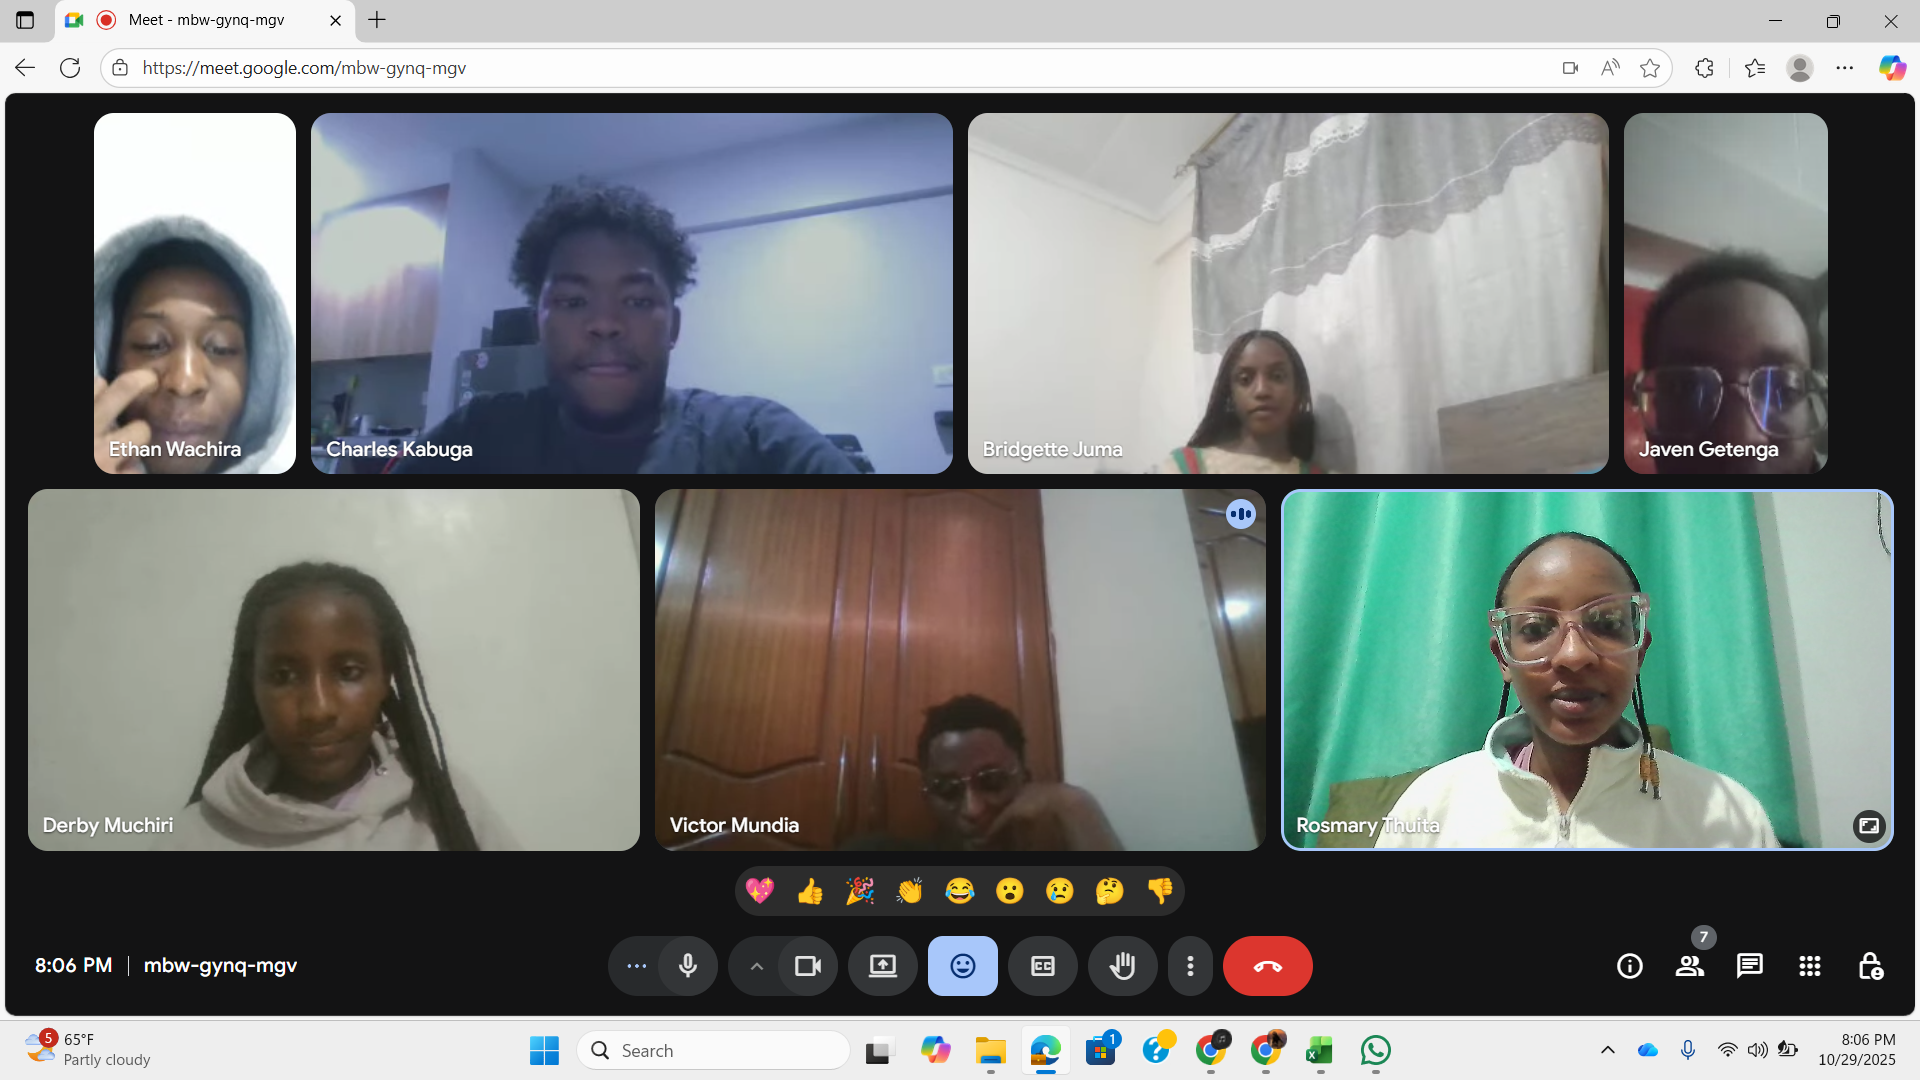

proof of teamwork